## Optimization  

# Gradient Descent and Newton's Algorithm

    Authors: Jesús Cid-Sueiro
             Jerónimo Arenas-García

#### **Name and NIA:** Ignacio Serrano - 100418944
#### **Name and NIA:** Leandro Hidalgo - 100391000

## Exercise: minimize a real-valued function

The goal of this exercise is to implement and test optimization algorithms for the minimization of a given function. Gradient descent and Newton's method will be explored.

Our goal it so find the minimizer of the real-valued function
$$
f(w) = 1 - w exp(-w)
$$
but the whole code will be easily modified to try with other alternative functions.

You will need to import some libraries (at least, `numpy` and `matplotlib`). Insert below all the imports needed along the whole notebook. Numpy is usually abbreviated as np and `matplotlib.pyplot` is usually abbreviated as `plt`.

In [0]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import math
from sympy.utilities.lambdify import lambdify
from sympy import *
import sympy

### Part 1: The function and its derivatives.

**Question 1.1**: Implement the following three methods:

* Method **`f`**: given $w$, it returns the value of function $f(w)$.
* Method **`df`**: given $w$, it returns the derivative of $f$ at $w$
* Medhod **`d2f`**: given $w$, it returns the second derivative of $f$ at $w$


In [0]:
w = Symbol('w')

f =  1-w*exp(-w)
df = f.diff(w)
d2f = df.diff(w)

# Funcion f
# <SOL>
f = lambdify(w, f)
# </SOL>

# First derivative
# <SOL>
df = lambdify(w, df)
# </SOL>

# Second derivative
# <SOL>
d2f = lambdify(w, d2f)
# </SOL>

### Part 2: Gradient descent.

**Question 2.1**: Implement a method **`gd`** that, given **`w`**, a learning rate parameter **`rho`** and a **`df`** method, applies a single iteration of the gradient descent algorithm and returns the updated weights and the squared module of the gradient, $|f'(w)|^2$

In [0]:
def gd(w, rho, df):
    w_new = w - rho*df(w)
    mod_sq = abs(df(w))**2
    return w_new, mod_sq

**Question 2.2**: Take **`rho=0.5`** and apply the gradient descent to optimize the given function. To do so, start with an initial value $w=0$ and iterate. Stop the algorithm when the squared gradient is below $10^{-9}$. Save two lists:

* A list of succesive values of $w_n$
* A list of succesive values of the function $f(w_n)$.

In [0]:
# <SOL>
# <SOL>
weights = []
f_values = []

w = 0
rho= 0.5
mod_sq = abs(df(w))**2
while(mod_sq>10**-9):
  
  weights.append(w)
  f_values.append(f(w))

  w_new, mod_sq_new = gd(w, rho, df)

  mod_sq = mod_sq_new
  w = w_new
# </SOL>
# </SOL>

**Question 2.3**: Plot, in a single figure:

* The given function, for values ranging from 0 to 20.
* The sequence of points $(w_n, f(w_n))$.

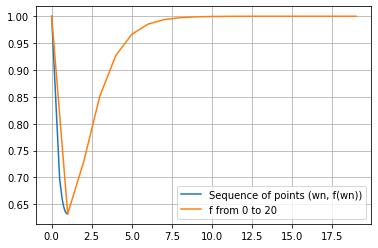

In [5]:
# <SOL>
plt.plot(weights[:20],f_values[:20], label='Sequence of points (wn, f(wn))')
plt.plot(f(np.arange(0,20,1)), label ='f from 0 to 20')
plt.legend()
plt.grid()
plt.show()
# </SOL>

**Question 2.4**: Implement the backtracking method. To do so, define method **`gd_bt`** that, given **`w`** a **`df`** method, the backtracking parameters **`alpha`** and **`beta`**, applies an iteration of the gradient descent algorithm, returning the updated weights and the squared module of the gradient,
$|f'(w)|^2$ 


In [0]:
# <SOL>
def gd_bt(w, df, rho, alpha, beta):

  delta = -1*df(w)
  f1 = f(w + rho*delta)
  f2 = f(w) + alpha*rho*df(w)*delta

  while f1 > f2:
    rho = beta*rho   
    f1 = f(w + rho*delta)
    f2 = f(w) + alpha*rho*df(w)*delta

  grad_sq = abs(df(w))**2
  w_new = w + rho*delta
  
  return w_new, grad_sq
# </SOL>

### Part 3: Newton's method.

**Question 3.1**: Implement a method **`newton`** that, given **`w`**, a gradient method **`df`** and a second derivative method **`df2`**, applies a single iteration of the Newton's method with backtracking selection of the learning rate, returning the updated weights and the squared Newton decrement

In [0]:
def newton(w0, df, df2, alpha, beta,rho):
    # <SOL>
    tol = 1e-4
    decrement = 1

    nt_step = (-1/df2(w0))*df(w0)
    decrement = (df(w0)*df(w0))*(df2(w0))

    if decrement/2 > tol:
      w_new, grad = gd_bt(w0,df,rho,alpha,beta)
      w0 = w_new + rho*nt_step
    return w0, decrement
    # <SOL>

**Question 3.2**: Apply the Newton's method to optimize the given function. To do so, start with an initial value $w=0$ and iterate $20$ times. Save two lists:

* A list of succesive values of $w_n$
* A list of succesive values of the function $f(w_n)$.

In [0]:
# <SOL>
w = 0
n = 40
w_n = []
f_wn = []
a = 0.001
b = 0.75
rho = 1.001

for i in range(n):

  w_n.append(w)
  f_wn.append(f(w))
  w_new, decrement = newton(w,df, d2f,a,b,rho)
  w = w_new
# </SOL>

**Question 3.3**: Plot, in a single figure:

* The given function, for values ranging from 0 to 20.
* The sequence of points $(w_n, f(w_n))$.

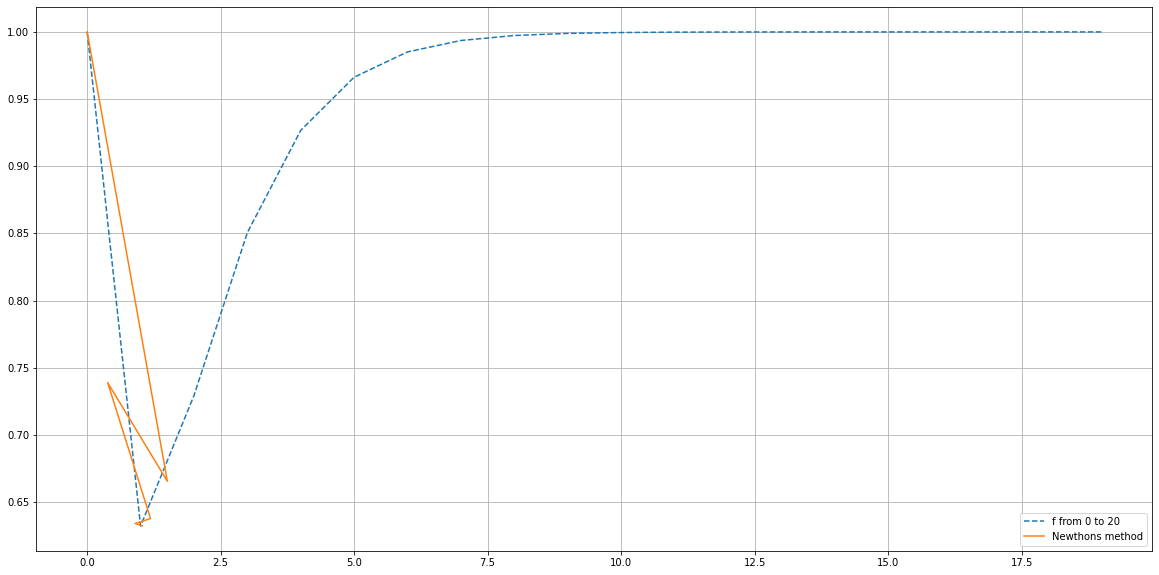

In [9]:
# <SOL>
plt.figure(figsize=(20,10))
plt.plot(f(np.arange(0,20,1)), '--',label ='f from 0 to 20')
plt.plot(w_n,f_wn, label='Newthons method')
plt.legend()
plt.grid()
plt.show()
# </SOL>

You can check the effect of modifying the value of the learning rate.

### Part 4: Multidimensional optimization

In this section we will generalize methods gd_bt and newton to deal with multidimensional optimization problems. We will apply it to the minimization o the function

$$
g(w_0, w_1) = \log\left(\exp(w_0+3 w_1 -01) + \exp(w_0-3w_1 -0.1) + \exp(-w_0 -0.1)\right)
$$

**Question 4.1**: Implement the following three methods:

* Method **`g`**: given $w$, it returns the value of function $f(w)$.
* Method **`dg`**: given $w$, it returns the gradient of $f$ at $w$
* Medhod **`d2g`**: given $w$, it returns the Hessian matrix of $f$ at $w$

In [0]:
# Funcion f
w0, w1 = symbols('w0 w1', real=True)
var = Matrix([w0, w1])

# Funcion f
# <SOL>
g = Matrix([sympy.log(exp(w0 + 3*w1 -0.1) + exp(w0 - 3*w1 - 0.1) + exp(-1*w0 - 0.1))])
# </SOL>

# First derivative
# <SOL>
dg = g.jacobian(var)
# </SOL>
# Second derivative
# <SOL>
d2g = hessian(g, var)
#</SOL>

**Question 4.2**: Extend method **`gd_bt`** to multidimensional inputs.


In [0]:
# <SOL>
def gd_bt_multi(w, dg, alpha, beta):
  w_new = np.zeros(len(w))
  rho=1
  grad=dg.evalf(subs={w0: w[0], w1: w[1]}).T
  delta = -1*grad
  
  g1 = g.evalf(subs={w0: (w[0] + rho*grad[0]), w1: (w[1] + rho*grad[1])})
  g2 = g.evalf(subs={w0: w[0], w1: w[1]}) + alpha*rho*grad.T*delta

  while g1[0] >= g2[0]:
    rho = beta*rho
    g1 = g.evalf(subs={w0: (w[0] + rho*grad[0]), w1: (w[1] + rho*grad[1])})
    g2 = g.evalf(subs={w0: w[0], w1: w[1]}) + alpha*rho*grad.T*delta
    w_new[0] = w[0] + rho*delta[0]
    w_new[1] = w[1] + rho*delta[1]
    w = w_new
  # grad_sq = abs(dg.evalf(subs={w0: w[0], w1: w[1]}))**2             
  return w_new, rho
# </SOL>

**Question 4.3**: Extend method **`newton`** to multidimensional inputs.


In [0]:
# <SOL>
def newton_multi(w, dg, d2g):
    # <SOL>
    alpha = 0.01
    beta = 0.3
    tol = 1e-7
    hess = d2g.evalf(subs={w0: w[0], w1: w[1]})
    grdt = dg.evalf(subs={w0: w[0], w1: w[1]}).T
    t_step = -1*hess.inv()*grdt
    decrement = grdt.T*hess.inv()*grdt
    if decrement[0]/2 <= tol:
      return w, decrement
    else:
      w_new, rho = gd_bt_multi(w,dg,alpha,beta)
      w[0] = w_new[0] + rho*t_step[0]
      w[1] = w_new[1] + rho*t_step[1]
    return w, decrement
# <SOL>

**Question 4.4**: Apply both methods to minimize function $g({\bf w})$. Plot the evolution of the function values at the given point, vs the number of iterations.


In [0]:
w = [0.1,0.6]
n = 20
w0_n = []
w1_n = []
g_wn = []

for i in range(n):
  w0_n.append(w[0])
  w1_n.append(w[1])
  g_wn.append(g.evalf(subs={w0: w[0], w1: w[1]}))
  w_new, decrement = newton_multi(w,dg,d2g)
  w = w_new

In [35]:
print('Mininimum value achived:',min(np.asarray(g_wn))[0])

Mininimum value achived: 0.939917032782622


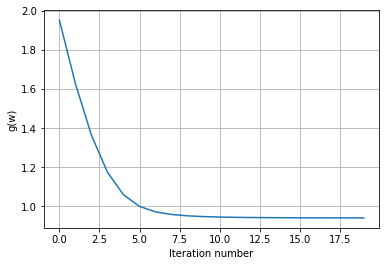

In [34]:
plt.plot(np.arange(20),np.asarray(g_wn))
plt.grid()
plt.ylabel('g(w)')
plt.xlabel('Iteration number')
plt.show()